In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def plot(dataset, min_datasize, methods_to_include):
    # Load the target data to get the dataset size
    datasize = pd.read_csv('../training_data/' + dataset + '/target.csv').shape[0]

    if(datasize > min_datasize):
        # Load the CSV data
        data = pd.read_csv('../acc_rate_csvs/' + dataset + '.csv')
        data = data[data['method'].isin(methods_to_include)]

        # Convert the numeric part of the method name to three-digit format
        data['method'] = data['method'].apply(lambda x: x.split('.')[0] + '.' + f"{int(x.split('.')[1]):03d}")

        # Group by method and calculate mean and standard deviation for accuracy
        grouped = data.groupby('method')['acc'].agg(['mean', 'std']).reset_index()

        # Plotting
        plt.figure(figsize=(6, int(len(methods_to_include)/3)))

        # Plot methods
        for _, row in grouped.iterrows():
            color = 'red' if row['method'].startswith('mlp') else ('blue' if row['method'].startswith('rf') else 'black')
            plt.errorbar(row['mean'], row['method'], xerr=0.2 * row['std'], fmt='o', color=color, capsize=5, capthick=2, elinewidth=2)

        # Add grid
        plt.grid(True, which='both', linestyle='--', linewidth=0.7)

        # Add labels and title
        plt.ylabel('Method')
        plt.xlabel('Accuracy')
        plt.title('Mean Accuracy and SD: ' + dataset + f" (N = {datasize})")

        # Show plot
        plt.tight_layout()
        plt.show()

In [3]:
folder_path = '../training_data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

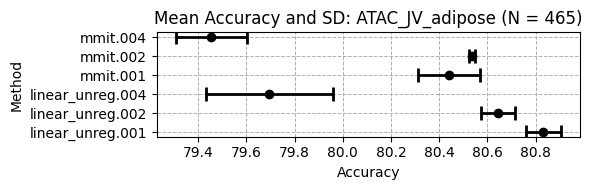

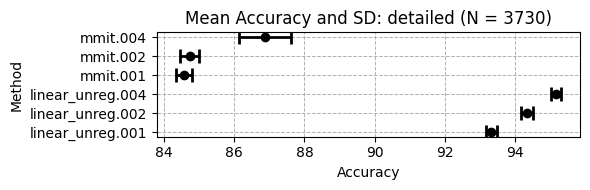

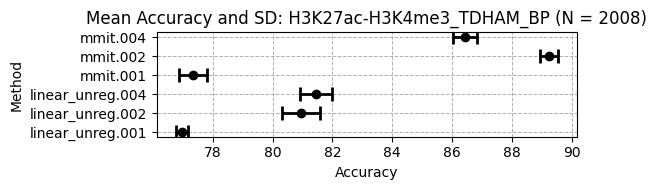

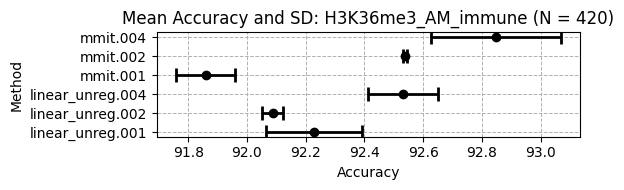

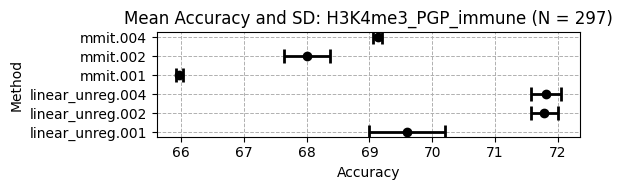

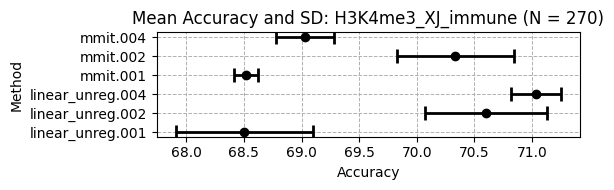

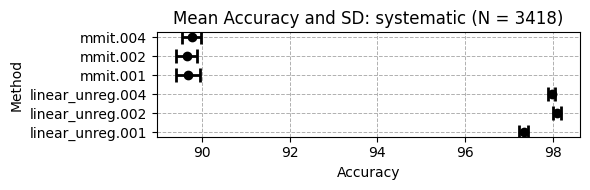

In [4]:
methods = ['linear_unreg.1', 'linear_unreg.2', 'linear_unreg.4', 
           'mmit.1',         'mmit.2',         'mmit.4']
for dataset in datasets:
    plot(dataset, 200, methods_to_include=methods)